<div style='padding:0px;background-color:#1ED760; color:black;border-radius:20px;font-size:100%;text-align: center; padding:10px; font-size:30px; margin-bottom:10px'> MUSIC RECOMMENDATION SYSTEM </div>

![](https://memgraph. <b>com/images/blog/spotify-song-recommender/cover. <b>png)

## <div style='padding:0px;background-color:#1ED760; color:black;border-radius:25px;font-size:100%;text-align: center; padding:10px; font-size:20px; margin-bottom:4px'>Data Description</div>
 
<div style='padding:0px; background-color:lightgreen; color:black;border-radius:5px;font-size:100%;text-align: left; padding:4px; font-size:16px;'>

Meta Data:
    
1. track_id: Unique identifier for each song.<br>

2. track_name: The name of the song.<br>

3. track_artist: The artist who performed the song.<br>

4. track_popularity: A measure of the song's popularity on a scale from 0 to 100, where higher values indicate greater popularity.<br>

5. track_album_id: Unique identifier for the album the song belongs to.<br>

6. track_album_name: Name of the album.<br>

7. track_album_release_date: The release date of the album.<br>

8. playlist_name: The name of the playlist containing the song.<br>

9. playlist_id: Unique identifier for the playlist.<br>

10. playlist_genre: The genre of the playlist.<br>

11. playlist_subgenre: Subgenre of the playlist.<br><br>


Musical Attributes:<br>
    
12. danceability: Describes how suitable a track is for dancing, ranging from 0.0 (least danceable) to 1.0 (most danceable).<br>

13. energy: Represents the intensity and activity of the track, with values from 0.0 to 1.0.<br>

14. key: The overall key of the track, represented as an integer (0=C, 1=C♯/D♭, etc.).<br>

15. loudness: The overall loudness of the track in decibels (dB), averaged across the track.<br>
    
16. mode: Indicates the track's modality (1=major, 0=minor).<br>

17. speechiness: Detects the presence of spoken words, with values closer to 1.0 indicating more speech-like content.<br>

18. acousticness: A measure from 0.0 to 1.0 indicating whether the track is acoustic.<br>

19. instrumentalness: Predicts whether the track contains no vocals, with higher values indicating more instrumental content.<br>

20. liveness: Detects the presence of a live audience, with values above 0.8 suggesting a live performance.<br>

21. valence: Describes the musical positiveness of a track, with values from 0.0 (negative, sad) to 1.0 (positive, happy).<br>

22. tempo: The tempo of the track in beats per minute (BPM).<br>

23. duration_ms: Duration of the track in milliseconds.<br>

This dataset provides comprehensive insights into each song, both in terms of its musical composition and its association with playlists.<br>
    
</div>

## <div style='padding:0px;background-color:#1ED760; color:black;border-radius:20px;font-size:100%;text-align: center; padding:10px; font-size:25px; margin-bottom:10px'>Importing Dependencies</div>
 

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

warnings.filterwarnings('ignore')

## <div style='padding:0px;background-color:#1ED760; color:black;border-radius:20px;font-size:100%;text-align: center; padding:10px; font-size:25px; margin-bottom:10px'>Dataset Overview</div>

In [2]:
# Loading Data
df = pd.read_csv("/kaggle/input/30000-spotify-songs/spotify_songs.csv")
df.head(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600


In [3]:
# Basic Information
print(f'Shape: {df.shape}')
print(f'\nData Types: \n{df.dtypes.value_counts()}')

Shape: (32833, 23)

Data Types: 
object     10
float64     9
int64       4
Name: count, dtype: int64


In [4]:
# Dataset Description
df.describe(exclude=['object']).T

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.000000,24.0000,45.000000,62.00000,100.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996


## <div style='padding:0px;background-color:#1ED760; color:black;border-radius:20px;font-size:100%;text-align: center; padding:10px; font-size:25px; margin-bottom:10px'>Data Cleaning</div>

In [5]:
print(f"\nNull Data: {df.isnull().sum().sum()}")
print(f"\nDuplicate Data: {df.duplicated(subset='track_id').sum()}")


Null Data: 15

Duplicate Data: 4477


In [6]:
# Drpping Missing Values
df.dropna(inplace=True)
df.drop_duplicates(subset='track_id', inplace=True)

In [7]:
# creating a new features release year and dropping feature 'track_album_release_date'
df['release_year'] = df['track_album_release_date'].apply(lambda date: str(date).split("-")[0]).astype('int')
df.drop(columns=['track_album_release_date'], axis=1, inplace=True)

## <div style='padding:0px;background-color:#1ED760; color:black;border-radius:20px;font-size:100%;text-align: center; padding:10px; font-size:25px; margin-bottom:10px'>Exploratory Data Analysis</div>

In [8]:
# Separating Categorical and Numerical Features
cat_features = [col for col in df.columns if df[col].dtype == "O"]
num_features = [col for col in df.columns if df[col].dtype != "O"]

print(f"Categorical Features: {list(cat_features)}")
print(f"\nNumerical Features: {list(num_features)}")

Categorical Features: ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre']

Numerical Features: ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'release_year']


In [9]:
# Total Unique Value For Each Categorical Feature 
print("Total Unique Values:")
print("--"*20)
for feature in cat_features:
    print(f"{feature}: {df[feature].nunique()}")

Total Unique Values:
----------------------------------------
track_id: 28352
track_name: 23449
track_artist: 10692
track_album_id: 22543
track_album_name: 19743
playlist_name: 448
playlist_id: 470
playlist_genre: 6
playlist_subgenre: 24


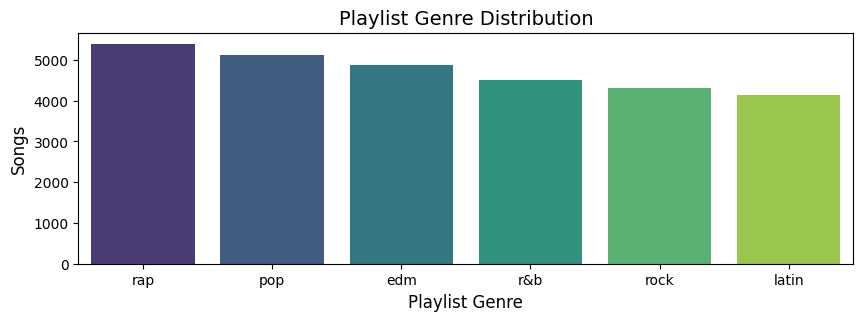

In [10]:
# Playlist Genre Distribution
value_counts = pd.DataFrame(df['playlist_genre'].value_counts()).reset_index()
value_counts.columns = ['playlist_genre', 'count']

plt.figure(figsize=(10, 3))
sns.barplot(x='playlist_genre', y='count', data=value_counts, palette='viridis')

plt.title('Playlist Genre Distribution',fontsize=14)
plt.xlabel('Playlist Genre',fontsize=12)
plt.ylabel('Songs',fontsize=12)
plt.show()

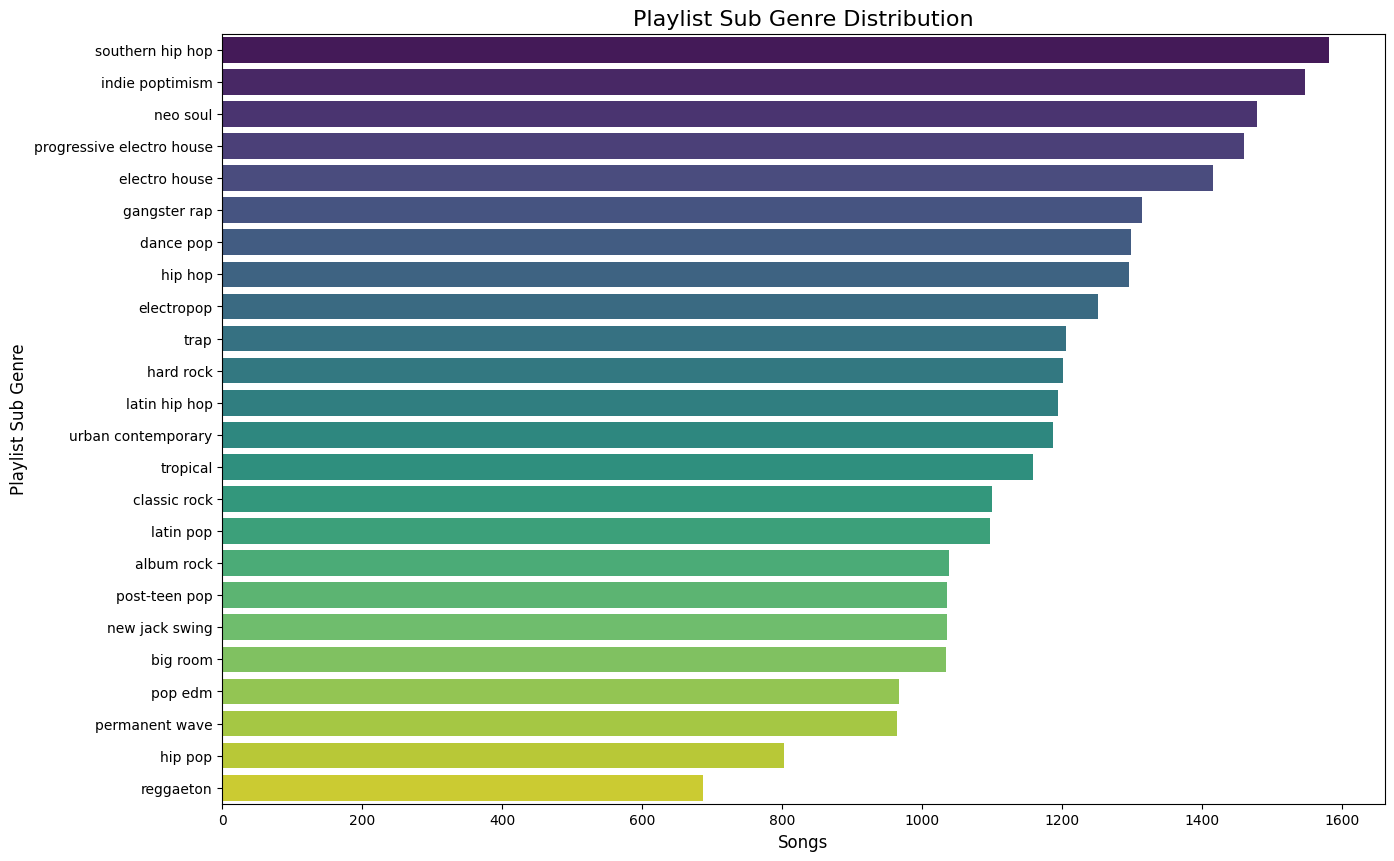

In [11]:
# Playlist Genre Distribution
value_counts = pd.DataFrame(df['playlist_subgenre'].value_counts()).reset_index()
value_counts.columns = ['playlist_subgenre', 'count']

plt.figure(figsize=(15, 10))
sns.barplot(y='playlist_subgenre', x='count', data=value_counts, palette='viridis')

plt.title('Playlist Sub Genre Distribution',fontsize=16)
plt.ylabel('Playlist Sub Genre',fontsize=12)
plt.xlabel('Songs',fontsize=12)
plt.show()

In [12]:
# Track Popularity by Playlist Genre and Subgenre
fig = px.sunburst(df, 
                  path=['playlist_genre', 'playlist_subgenre'], 
                  values='track_popularity',  
                  color='track_popularity',   
                  color_continuous_scale='viridis',  
                  title='Track Popularity by Playlist Genre and Subgenre')

fig.update_coloraxes(showscale=False)
fig.update_layout(title_font_size=16,title_x=0.5)
fig.show()

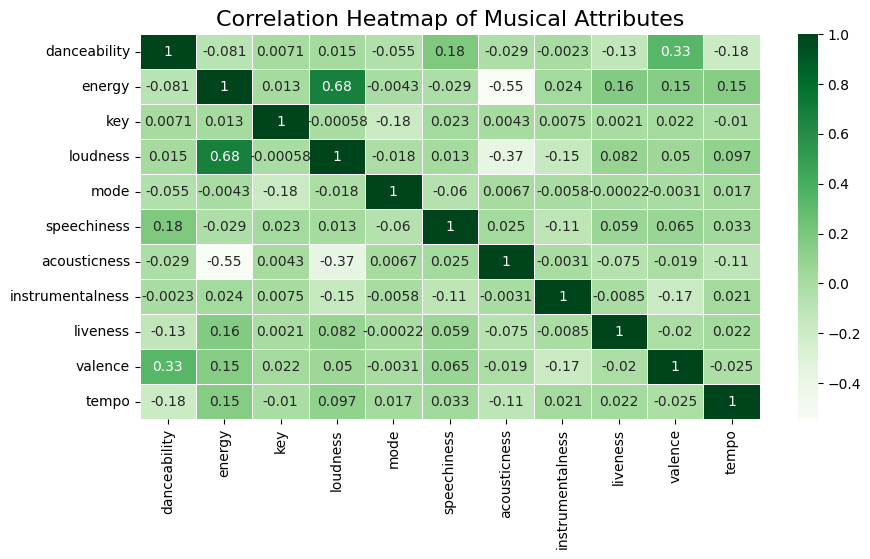

In [13]:
# Correlation of Musical Attributes
musical_attributes = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

corr = musical_attributes.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='Greens', linewidths=0.5)
plt.title('Correlation Heatmap of Musical Attributes', fontsize=16)
plt.show()

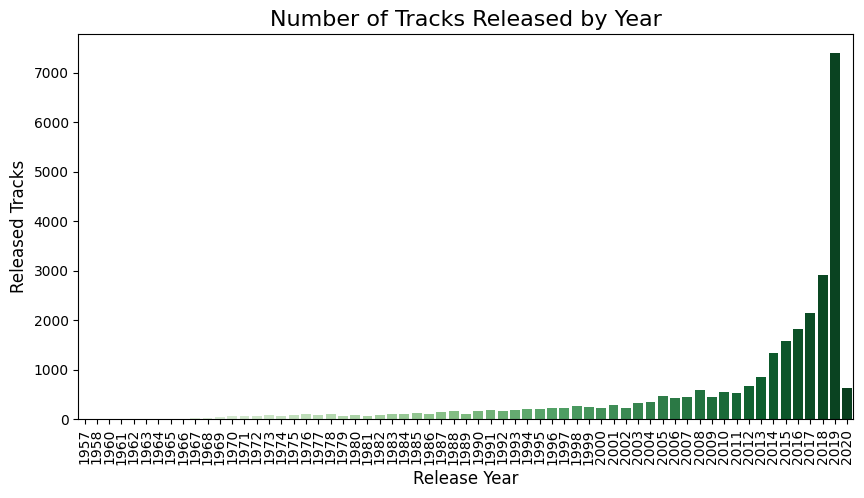

In [14]:
# Number of Tracks Released by Year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='release_year', palette='Greens')
plt.title('Number of Tracks Released by Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Released Tracks', fontsize=12)
plt.xticks(rotation=90)
plt.show()

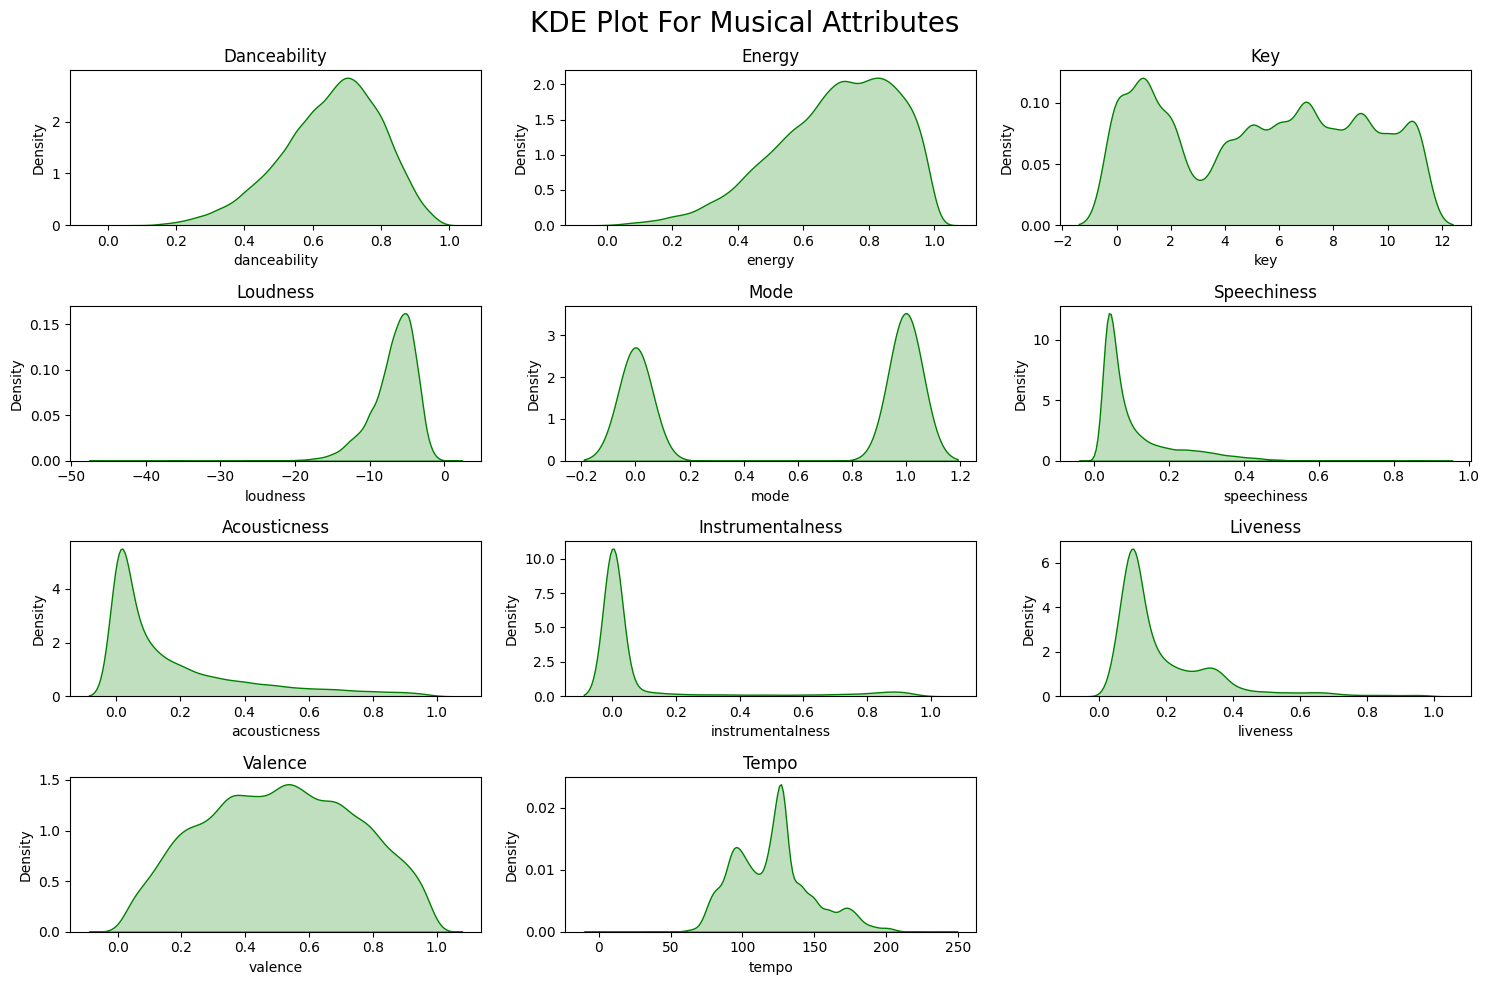

In [15]:
# KDE Plot For Musical Attributes
plt.figure(figsize=(15, 10))

for i, attr in enumerate(musical_attributes):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(df[attr], color='green', fill=True)
    plt.title(f'{str(attr).capitalize()}')
    plt.xlabel(attr)
    plt.ylabel('Density')

plt.suptitle("KDE Plot For Musical Attributes", size=20)
plt.tight_layout()
plt.show()

In [16]:
# Most popular tracks for Artist
fig = px.treemap(
    df.groupby(['track_artist', 'track_name'])['track_popularity'].mean().sort_values(ascending=False).reset_index()[:100],
    path=[px.Constant("Artists"), 'track_artist', 'track_name'], 
    values='track_popularity',
    labels={'track_popularity': 'Popularity'},
)
fig.update_traces(
    hovertemplate="<b>%{label}</b><br><br>Popularity=%{value:.2f}<extra></extra>"
)
fig.update_layout(
    title={
        'text':"Most popular tracks for Artist",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center'},
    margin=dict(t=70)
)
fig.show()

## <div style='padding:0px;background-color:#1ED760; color:black;border-radius:20px;font-size:100%;text-align: center; padding:10px; font-size:25px; margin-bottom:10px'>Feature Encoding</div>

In [17]:
# Mapping Genre & Subgenre
df['genre'] = df['playlist_genre'].map({genre: i for i, genre in enumerate(df['playlist_genre'].unique())})
df['subgenre'] = df['playlist_subgenre'].map({genre: i for i, genre in enumerate(df['playlist_subgenre'].unique())})

df.drop(columns=['playlist_genre', 'playlist_subgenre'], axis=1, inplace=True)

## <div style='padding:0px;background-color:#1ED760; color:black;border-radius:20px;font-size:100%;text-align: center; padding:10px; font-size:25px; margin-bottom:10px'>Feature Scaling</div>

In [18]:
# Applying Mix Max Scaling:
features = df[['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
               'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'genre']]

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.66,0.760936,0.915985,0.545455,0.918090,1.0,0.063508,0.102616,0.000000,0.065562,0.522704,0.509673,0.0
1,0.67,0.738555,0.814968,1.000000,0.869162,1.0,0.040632,0.072837,0.004235,0.358434,0.699294,0.417524,0.0
2,0.70,0.686673,0.930988,0.090909,0.901368,0.0,0.080828,0.079879,0.000023,0.110442,0.618567,0.517908,0.0
3,0.60,0.730417,0.929988,0.636364,0.894118,1.0,0.111111,0.028873,0.000009,0.204819,0.279516,0.509338,0.0
4,0.69,0.661241,0.832971,0.090909,0.875385,1.0,0.039107,0.080785,0.000000,0.083635,0.731584,0.517775,0.0


## <div style='padding:0px;background-color:#1ED760; color:black;border-radius:20px;font-size:100%;text-align: center; padding:10px; font-size:25px; margin-bottom:10px'>Calculating Cosine Similarity</div>

In [19]:
# Calculating cosine similarity
cosine_sim = cosine_similarity(scaled_df)
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['track_name'], columns=df['track_name'])

## <div style='padding:0px;background-color:#1ED760; color:black;border-radius:20px;font-size:100%;text-align: center; padding:10px; font-size:25px; margin-bottom:10px'>Predicting Top 10 Similar Songs</div>

In [20]:
def get_similar_tracks(track_name, cosine_sim_matrix, df, top_n=10):
    # Get index of the selected track
    track_idx = df[df['track_name'] == track_name].index[0]
    
    # Get cosine similarity scores for the selected track
    sim_scores = list(enumerate(cosine_sim_matrix[track_idx]))
    
    # Sort the tracks based on similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N most similar tracks (excluding the selected track itself)
    sim_scores = sim_scores[1:top_n + 1]
    
    # Collect track details
    similar_tracks = [
        {
            'track_id': df['track_id'][i[0]],
            'track_name': df['track_name'][i[0]],
            'track_artist': df['track_artist'][i[0]],
            'release_year': df['release_year'][i[0]],
            'similarity_score': i[1]
        }
        for i in sim_scores
    ]
    
    return similar_tracks

In [21]:
# Predicting the most similar tracks for a given track_name
track_to_predict = "Shape of You"  
similar_tracks = get_similar_tracks(track_to_predict, cosine_sim, df)

track_ids = [track['track_id'] for track in similar_tracks]
track_names = [track['track_name'] for track in similar_tracks]
track_artists = [track['track_artist'] for track in similar_tracks]
release_years = [track['release_year'] for track in similar_tracks]
similarity_scores = [f"{track['similarity_score']:.2f}" for track in similar_tracks]


fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Track Name</b>', '<b>Artist</b>', '<b>Release Year</b>', '<b>Similarity Score</b>'],
                fill_color='#1ED760',
                font_color="black",
                align='left'),
    
    cells=dict(values=[track_names, track_artists, release_years, similarity_scores],
               fill_color='lightgreen',
                font_color="black",
                   
               align='left'))
])

fig.update_layout(title=f"Tracks Similar to '{track_to_predict}'")
fig.show()